In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import boto3

In [2]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='capstone1largedata', Key='US_Accidents_Dec19.csv')
data = pd.read_csv(obj['Body'])

/home/david/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
corr_df = data[['ID', 'Severity', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']].copy()

In [6]:
corr_df.head()

,ID,Severity,City,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,A-1,3,Dayton,OH,36.9,NaN,91.0,29.68,10.0,NaN,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,Reynoldsburg,OH,37.9,NaN,100.0,29.65,10.0,NaN,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,Williamsburg,OH,36.0,33.3,100.0,29.67,10.0,3.5,...,False,False,False,False,False,False,False,False,True,Night
3,A-4,3,Dayton,OH,35.1,31.0,96.0,29.64,9.0,4.6,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,2,Dayton,OH,36.0,33.3,89.0,29.65,6.0,3.5,...,False,False,False,False,False,False,False,False,True,Day


In [7]:
night_dct = {'Night':True, 'Day':False}

In [8]:
corr_df['Night'] = corr_df['Sunrise_Sunset'].map(night_dct)

In [9]:
corr_df.drop(columns='Sunrise_Sunset', inplace=True)

In [10]:
corr_df['Traffic_Calming'].fillna(False, inplace=True)
corr_df['Traffic_Signal'].fillna(False, inplace=True)
corr_df['Roundabout'].fillna(False, inplace=True)
corr_df['Railway'].fillna(False, inplace=True)
corr_df['No_Exit'].fillna(False, inplace=True)
corr_df['Junction'].fillna(False, inplace=True)
corr_df['Give_Way'].fillna(False, inplace=True)
corr_df['Crossing'].fillna(False, inplace=True)
corr_df['Bump'].fillna(False, inplace=True)

In [11]:
corr_df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [12]:
corr_df['Weather_Condition'].fillna('', inplace=True)

In [16]:
snow = corr_df[corr_df['Weather_Condition'].str.contains('snow', case=False)].copy()
rain = corr_df[corr_df['Weather_Condition'].str.contains('rain', case=False)].copy()
fog = corr_df[corr_df['Weather_Condition'].str.contains('fog', case=False)].copy()
wind = corr_df[corr_df['Weather_Condition'].str.contains('wind', case=False)].copy()
smoke = corr_df[corr_df['Weather_Condition'].str.contains('smoke', case=False)].copy()
dust = corr_df[corr_df['Weather_Condition'].str.contains('dust', case=False)].copy()
freezing = corr_df[corr_df['Weather_Condition'].str.contains('freezing', case=False)].copy()

In [19]:
conditions = [snow, rain, fog, wind, smoke, dust, freezing]
means = [condition['Severity'].values.mean() for condition in conditions]
conditions = ['snow', 'rain', 'fog', 'wind', 'smoke', 'dust', 'freezing']

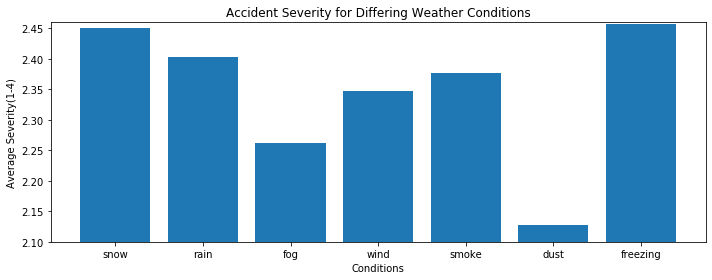

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(conditions, means)
ax.set_ylim(2.1,2.46)
ax.set_xlabel('Conditions')
ax.set_ylabel('Average Severity(1-4)')
ax.set_title('Accident Severity for Differing Weather Conditions')
plt.savefig('../images/sev_cond.png')
plt.tight_layout()

In [21]:
sc_data = data[data['State']=='SC']
sc_fog = sc_data[sc_data['Weather_Condition'].str.contains('fog', case=False)].copy()
